# GARCH with Exogeneous

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [5]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as web
import numpy as np

In [6]:
start = pd.Timestamp('2017-01-01')
end = pd.Timestamp('2020-12-31')
priceData = web.DataReader('LLOY.L', 'yahoo', start, end)\
      [['Close']]
priceData['logReturn'] = np.log(priceData['Close']).diff().mul(100)
priceData = priceData.dropna()

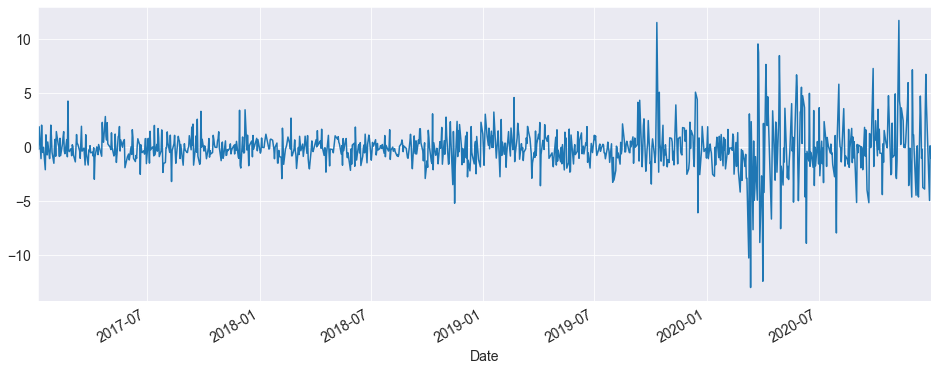

In [7]:
ax = priceData['logReturn'].plot()
xlim = ax.set_xlim(priceData['logReturn'].index.min(), priceData['logReturn'].index.max())

In [10]:
from arch import arch_model
am = arch_model(priceData['logReturn'])
res = am.fit(update_freq = 5)
print(res.summary)

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1890.3048763098836
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1889.3440673131627
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1889.3440673117802
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:              logReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1889.34
Distribution:                  Normal   AIC:                           3786.69
Method:            Maximum Likelihood   BIC:                           3806.36
                                        No. Observations:                 1011
Date:                Mon, Jun 27 2022   Df Residua

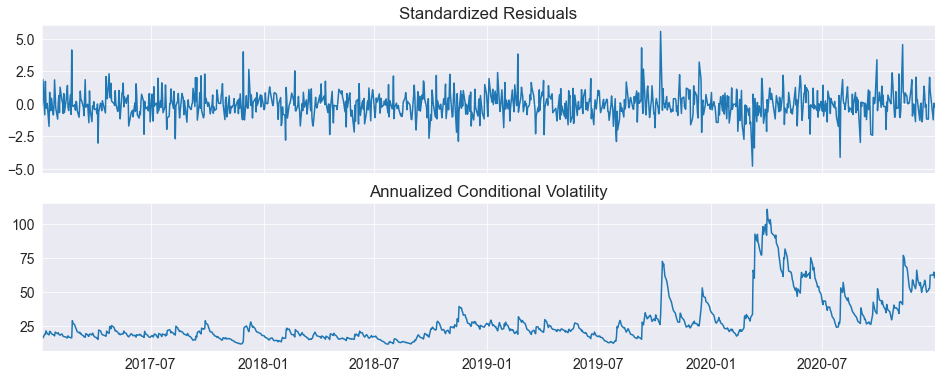

In [11]:
fig = res.plot(annualize = "D")

In [15]:
am = arch_model(priceData['logReturn'], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              logReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1885.51
Distribution:                  Normal   AIC:                           3781.03
Method:            Maximum Likelihood   BIC:                           3805.62
                                        No. Observations:                 1011
Date:                Mon, Jun 27 2022   Df Residuals:                     1010
Time:                        20:55:28   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0360  4.240e-02     -0.848      0.396 [ -0.119,

In [17]:
am = arch_model(priceData['logReturn'], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     39,   Neg. LLF: 2447.1867811815705
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1886.2799745348386
Iteration:     15,   Func. Count:    102,   Neg. LLF: 1886.269531805033
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1886.2695362119125
            Iterations: 15
            Function evaluations: 102
            Gradient evaluations: 15
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:              logReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1886.27
Distribution:                  Normal   AIC:                           3782.54
Method:            Maximum Likelihood   BIC:                           3807.13
                                        No. Observations:                 1011
Date:             

In [21]:
am = arch_model(priceData['logReturn'], p=1, o=1, q=1, power=1.0, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 2652.7346554839364
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1840.0852837887464
Iteration:     15,   Func. Count:    120,   Neg. LLF: 1838.3254623183682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1838.3254564967228
            Iterations: 18
            Function evaluations: 139
            Gradient evaluations: 17
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                    logReturn   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -1838.33
Distribution:      Standardized Student's t   AIC:                           3688.65
Method:                  Maximum Likelihood   BIC:                           3718.16
                                              No. Observatio

# Building a Model From Components


In [23]:
from arch.univariate import ARX
Irithmics = pd.read_csv('agg.csv')
Irithmics = Irithmics[['Date', 'shortProb']]
Irithmics['Date'] = pd.to_datetime(Irithmics['Date'])
Irithmics =Irithmics.set_index('Date')

ar = ARX(100 * Irithmics['shortProb'])
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:              shortProb   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:          Constant Variance   Log-Likelihood:               -352.995
Distribution:                  Normal   AIC:                           709.990
Method:            Maximum Likelihood   BIC:                           717.057
                                        No. Observations:                  253
Date:                Mon, Jun 27 2022   Df Residuals:                      252
Time:                        20:58:48   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          1.3450  6.140e-02     21.907 2.238e-106 [  1.225,  1.46

In [27]:
from arch.univariate import ARCH, GARCH

ar.volatility = ARCH(p=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - ARCH Model Results                            
Dep. Variable:              shortProb   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -251.129
Distribution:                  Normal   AIC:                           508.258
Method:            Maximum Likelihood   BIC:                           518.858
                                        No. Observations:                  253
Date:                Mon, Jun 27 2022   Df Residuals:                      252
Time:                        20:59:54   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0.8266  6.268e-02     13.188  1.035e-39 [  0.704,  0.94

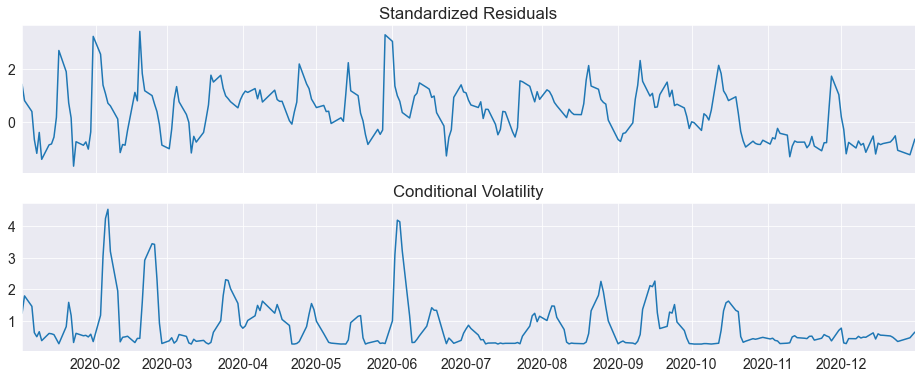

In [28]:
fig = res.plot()

In [29]:
from arch.univariate import StudentsT

ar.distribution = StudentsT()
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                              AR - ARCH Model Results                               
Dep. Variable:                    shortProb   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -250.695
Distribution:      Standardized Student's t   AIC:                           509.390
Method:                  Maximum Likelihood   BIC:                           523.524
                                              No. Observations:                  253
Date:                      Mon, Jun 27 2022   Df Residuals:                      252
Time:                              21:00:18   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0

In [31]:
from collections import OrderedDict


irith = 100 * Irithmics['shortProb']
res_normal = arch_model(irith).fit(disp="off")
res_t = arch_model(irith, dist="t").fit(disp="off")
res_skewt = arch_model(irith, dist="skewt").fit(disp="off")
lls = pd.Series(
    OrderedDict(
        (
            ("normal", res_normal.loglikelihood),
            ("t", res_t.loglikelihood),
            ("skewt", res_skewt.loglikelihood),
        )
    )
)
print(lls)
params = pd.DataFrame(
    OrderedDict(
        (
            ("normal", res_normal.params),
            ("t", res_t.params),
            ("skewt", res_skewt.params),
        )
    )
)
params

normal   -251.128824
t        -250.695206
skewt    -239.330326
dtype: float64


,normal,t,skewt
alpha[1],1.000000e+00,1.000000e+00,0.756477
beta[1],1.516816e-11,8.133297e-15,0.074723
eta,NaN,NaN,160.068808
lambda,NaN,NaN,0.645569
mu,8.266403e-01,8.145011e-01,0.971224
nu,NaN,2.721634e+01,NaN
omega,7.797370e-02,7.308264e-02,0.069418


C:\Users\zaneh\AppData\Local\Temp\ipykernel_26064\389123519.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([std_resid, unit_var_resid], 1)


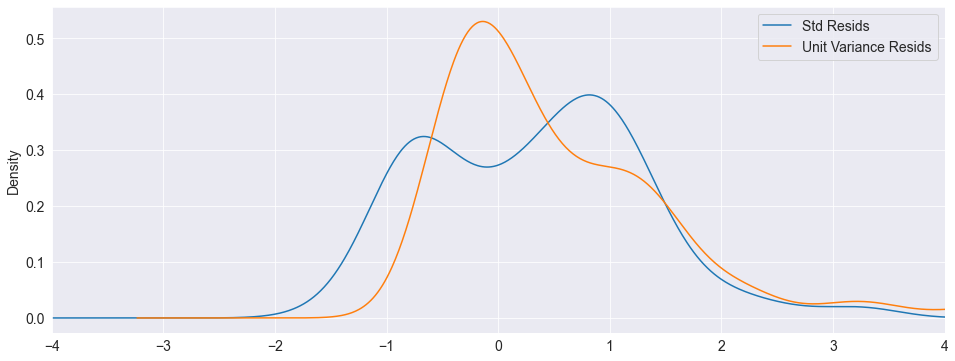

In [32]:


std_resid = res_normal.resid / res_normal.conditional_volatility
unit_var_resid = res_normal.resid / res_normal.resid.std()
df = pd.concat([std_resid, unit_var_resid], 1)
df.columns = ["Std Resids", "Unit Variance Resids"]
subplot = df.plot(kind="kde", xlim=(-4, 4))

